In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from konlpy.tag import Kkma
from konlpy.utils import pprint

In [3]:
df = pd.read_csv('C:/Users/User/github/Web_Crawling/save_data/2022-01_stock.csv')

In [4]:
kkma = Kkma()

In [5]:
line = []
for i in tqdm(range(len(df))):
    a = df.iloc[:,1][i]
    k = kkma.nouns(a)
    z = [u for u in k if len(u) > 1] 
    line.append(z)


100%|██████████| 4994/4994 [01:28<00:00, 56.17it/s] 


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서를 명사 집합으로 보고 문서 리스트로 치환 (tfidfVectorizer 인풋 형태를 맞추기 위해)
text = [" ".join(noun) for noun in line]

tfidf_vectorizer = TfidfVectorizer(min_df = 5, ngram_range=(1,5))
tfidf_vectorizer.fit(text)
vector = tfidf_vectorizer.transform(text).toarray()

In [7]:
from sklearn.cluster import DBSCAN
import numpy as np

vector = np.array(vector) # Normalizer를 이용해 변환된 벡터
model = DBSCAN(eps=0.3,min_samples=10, metric = "cosine")
# 거리 계산 식으로는 Cosine distance를 이용
result = model.fit_predict(vector)

In [8]:
import matplotlib.pyplot as plt

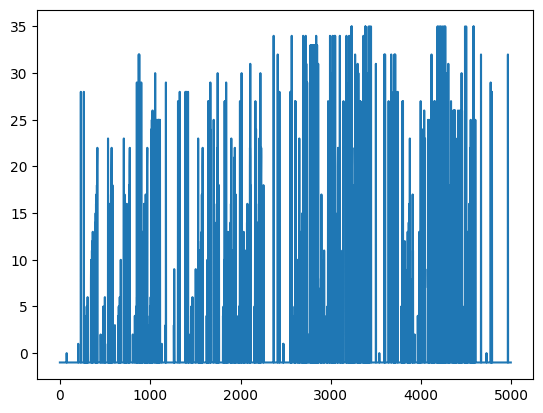

In [9]:
plt.plot(result)

In [10]:
df

,date,title
0,20220101,[속보]로또996회1등당첨번호6·11·15·24·32·39…보너스28
1,20220101,지난해수출·무역액사상최대…올해수출7천억달러시대'도전'
2,20220101,"[위클리핫코인]아이콘,에어드랍기대감에‘화성’갔지만…스냅샷직후8.8%급락"
3,20220101,[위클리코인리뷰]암호화폐시세‘뚝뚝’…우울한연말보낸투자자들
4,20220101,24兆팔았던연기금…올해어떻게달라질까
...,...,...
4989,20220131,"[fn마켓워치]IMMICS,5000억펀드추진..이서현삼성생명지분인수추진"
4990,20220131,‘아마존닷컴너마저?’어닝쇼크걱정[3분미국주식]
4991,20220131,[금알못]암호화폐유사수신조심하세요
4992,20220131,"카카오·네이버,올해24%·18%'뚝'…주가회복가능할까"


In [11]:
df['result'] = result

In [12]:
for cluster_num in set(result):
    # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
    if(cluster_num == -1 or cluster_num == 0): 
        continue
    else:
        print("cluster num : {}".format(cluster_num))
        temp_df = df[df['result'] == cluster_num] # cluster num 별로 조회
        for title in temp_df['title']:
            print(title) # 제목으로 살펴보자
        print()

cluster num : 1
[표]주간코스닥기관·외국인·개인순매수·도상위종목(12월27일~30일)
[표]주간유가증권기관·외국인·개인순매수·도상위종목(12월27일~30일)
[표]코스닥기관·외국인·개인순매수·도상위종목(1월3일-최종치)
[표]유가증권기관·외국인·개인순매수·도상위종목(1월3일-최종치)
[표]코스닥기관·외국인·개인순매수·도상위종목(1월4일-최종치)
[표]유가증권기관·외국인·개인순매수·도상위종목(1월4일-최종치)
[표]코스닥기관·외국인·개인순매수·도상위종목(1월5일-최종치)
[표]유가증권기관·외국인·개인순매수·도상위종목(1월5일-최종치)
[표]코스닥기관·외국인·개인순매수·도상위종목(1월6일-최종치)
[표]유가증권기관·외국인·개인순매수·도상위종목(1월6일-최종치)
[표]코스닥기관·외국인·개인순매수·도상위종목(1월7일-최종치)
[표]유가증권기관·외국인·개인순매수·도상위종목(1월7일-최종치)
[표]코스닥기관·외국인·개인순매수·도상위종목(1월7일)
[표]유가증권기관·외국인·개인순매수·도상위종목(1월7일)
[표]코스닥기관·외국인·개인순매수·도상위종목(1월10일-최종치)
[표]유가증권기관·외국인·개인순매수·도상위종목(1월10일-최종치)
[표]주간코스닥기관·외국인·개인순매수·도상위종목(1월10일~14일)
[표]주간유가증권기관·외국인·개인순매수·도상위종목(1월10일~14일)

cluster num : 2
구겐하임"나이키,올해가장좋은투자처"[강영연의뉴욕오프닝]
플루리미"애플,美경제보다빠르게성장할것…이상적인기업"[강영연의뉴욕오프닝]
BoA"코인베이스,암호화폐거래소이상의가치…투자의견상향"[강영연의뉴욕오프닝]
BoA"디스커버리,합병으로경쟁력확보할것…주가75%더오른다"[강영연의뉴욕오프닝]
"나이키,中매출감소충격적"…HSBC,투자의견하향[강영연의뉴욕오프닝]
골드만삭스"美데이팅산업급성장"…범블·매치그룹이톱픽[강영연의뉴욕오프닝]
도이체방크"애플,인플레이션시기매력적…200달러까지간다"[강영연의뉴욕오프닝]
제프리스"포드,전기차기대로과도하게상승…테슬라가낫다"[강영연의뉴욕오프닝]
에버코어

In [13]:
df[df['result'] == 1]

,date,title,result
202,20220102,[표]주간코스닥기관·외국인·개인순매수·도상위종목(12월27일~30일),1
203,20220102,[표]주간유가증권기관·외국인·개인순매수·도상위종목(12월27일~30일),1
309,20220103,[표]코스닥기관·외국인·개인순매수·도상위종목(1월3일-최종치),1
310,20220103,[표]유가증권기관·외국인·개인순매수·도상위종목(1월3일-최종치),1
500,20220104,[표]코스닥기관·외국인·개인순매수·도상위종목(1월4일-최종치),1
501,20220104,[표]유가증권기관·외국인·개인순매수·도상위종목(1월4일-최종치),1
664,20220105,[표]코스닥기관·외국인·개인순매수·도상위종목(1월5일-최종치),1
668,20220105,[표]유가증권기관·외국인·개인순매수·도상위종목(1월5일-최종치),1
856,20220106,[표]코스닥기관·외국인·개인순매수·도상위종목(1월6일-최종치),1
860,20220106,[표]유가증권기관·외국인·개인순매수·도상위종목(1월6일-최종치),1


In [14]:
df[df['result'] == 2]

,date,title,result
273,20220103,"구겐하임""나이키,올해가장좋은투자처""[강영연의뉴욕오프닝]",2
451,20220104,"플루리미""애플,美경제보다빠르게성장할것…이상적인기업""[강영연의뉴욕오프닝]",2
807,20220106,"BoA""코인베이스,암호화폐거래소이상의가치…투자의견상향""[강영연의뉴욕오프닝]",2
984,20220107,"BoA""디스커버리,합병으로경쟁력확보할것…주가75%더오른다""[강영연의뉴욕오프닝]",2
1428,20220110,"""나이키,中매출감소충격적""…HSBC,투자의견하향[강영연의뉴욕오프닝]",2
1962,20220113,"골드만삭스""美데이팅산업급성장""…범블·매치그룹이톱픽[강영연의뉴욕오프닝]",2
2758,20220118,"도이체방크""애플,인플레이션시기매력적…200달러까지간다""[강영연의뉴욕오프닝]",2
3114,20220120,"제프리스""포드,전기차기대로과도하게상승…테슬라가낫다""[강영연의뉴욕오프닝]",2
3291,20220121,"에버코어ISI""넷플릭스성장성에의문""…투자의견하향[강영연의뉴욕오프닝]",2
3928,20220125,"웰스파고""나이키매수할좋은기회…20%상승여력""[강영연의뉴욕오프닝]",2


In [15]:
df[df['result'] == 3]

,date,title,result
283,20220103,'파주왕개미'가오스템임플란트횡령범...2만주주들'경악'한사연,3
287,20220103,"[뉴스추적]오스템임플란트횡령직원이슈퍼개미?/혼자서1,880억원을횡령?/상장폐지가능성은?",3
609,20220104,"""업계대장바뀌나""…오스템임플란트횡령사건에'2인자'덴티움주가강세",3
726,20220105,"오스템임플란트,횡령사고유동성위기론선긋고“경영이상無…재발방지”",3
875,20220106,"오스템임플란트""횡령개인일탈…윗선개입없다""",3
970,20220106,"오스템임플란트""횡령사건,윗선개입사실없어""",3
1170,20220108,"오스템임플란트횡령직원,영장심사포기···서면심리로구속여부판단",3
1262,20220109,"초유의오스템임플란트횡령,'신외감법무용론'번지나",3
1538,20220110,"오스템임플란트""반환금액합치면횡령액은1880억원아닌2215억원""",3
1548,20220110,"오스템임플란트""횡령액1880억→2215억""정정공시",3


In [16]:
df[df['result'] == 4]

,date,title,result
291,20220103,[표]아시아주요증시동향(1월3일),4
480,20220104,[표]아시아주요증시동향(1월4일),4
647,20220105,[표]아시아주요증시동향(1월5일),4
830,20220106,[표]아시아주요증시동향(1월6일),4
996,20220107,[표]아시아주요증시동향(1월7일),4
1452,20220110,[표]아시아주요증시동향(1월10일),4
1625,20220111,[표]아시아주요증시동향(1월11일),4
1806,20220112,[표]아시아주요증시동향(1월12일),4
1977,20220113,[표]아시아주요증시동향(1월13일),4
2152,20220114,[표]아시아주요증시동향(1월14일),4


In [17]:
df[df['result'] == 5]

,date,title,result
297,20220103,장마감후기업공시[1월3일],5
481,20220104,장마감후기업공시[1월4일],5
652,20220105,[장마감후기업공시]1월5일,5
845,20220106,장마감후기업공시[1월6일],5
998,20220107,장마감후기업공시[1월7일],5
1455,20220110,장마감후기업공시[1월10일],5
1631,20220111,장마감후기업공시[1월11일],5
1812,20220112,장마감후기업공시[1월12일],5
1984,20220113,장마감후기업공시[1월13일],5
2155,20220114,장마감후기업공시[1월14일],5


In [18]:
df[df['result']==6]

,date,title,result
307,20220103,[표]유가증권코스닥투자주체별매매동향(1월3일-최종치),6
498,20220104,[표]유가증권코스닥투자주체별매매동향(1월4일-최종치),6
663,20220105,[표]유가증권코스닥투자주체별매매동향(1월5일-최종치),6
854,20220106,[표]유가증권코스닥투자주체별매매동향(1월6일-최종치),6
1005,20220107,[표]유가증권코스닥투자주체별매매동향(1월7일-최종치),6
1468,20220110,[표]유가증권코스닥투자주체별매매동향(1월10일-최종치),6
1643,20220111,[표]유가증권코스닥투자주체별매매동향(1월11일-최종치),6
1824,20220112,[표]유가증권코스닥투자주체별매매동향(1월12일-최종치),6
1992,20220113,[표]유가증권코스닥투자주체별매매동향(1월13일-최종치),6
2163,20220114,[표]유가증권코스닥투자주체별매매동향(1월14일-최종치),6


In [19]:
df[df['result'] == 7]

,date,title,result
343,20220103,[코스닥공시]동원개발/오리엔트정공/폴라리스웍스,7
534,20220104,[코스닥공시]브리지텍/비아트론/기가레인,7
706,20220105,[코스닥공시]넥스틴/아이진/대보마그네틱,7
887,20220106,[코스닥공시]수젠텍,7
1023,20220107,[코스닥공시]라이프시맨틱스/지니뮤직/싸이맥스등,7
1532,20220110,[코스닥공시]비에이치아이/대보마그네틱/서희건설,7
1899,20220112,[코스닥공시]에이비엘바이오/엑시콘/나노씨엠에스등,7
2209,20220114,[코스닥공시]이노메트리,7
2889,20220118,[코스닥공시]대보마그네틱/제이스텍/셀리드,7
3045,20220119,[코스닥공시]로스웰/덕산테코피아/스포츠서울,7


In [20]:
df['result'].value_counts()

-1     4416
 27      32
 4       20
 6       20
 35      20
 5       19
 9       19
 10      19
 11      19
 12      19
 13      19
 3       18
 0       18
 1       18
 26      17
 23      16
 17      16
 16      16
 19      15
 7       15
 20      15
 21      15
 22      15
 14      15
 18      14
 8       14
 28      14
 33      13
 34      13
 31      13
 15      13
 25      13
 30      12
 32      12
 24      11
 2       11
 29      10
Name: result, dtype: int64